In [1]:
import pandas as pd

data = pd.read_csv('housing.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [3]:
# Crear un diccionario para mapear las categorías a valores numéricos
mapping = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}

# Aplicar el mapeo a la columna 'ocean_proximity'
data['ocean_proximity'] = data['ocean_proximity'].map(mapping)

# Verificar la conversión
print(data['ocean_proximity'].head())

# Asegurarse de que la columna es de tipo int
data['ocean_proximity'] = data['ocean_proximity'].astype(int)

0    0
1    0
2    0
3    0
4    0
Name: ocean_proximity, dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


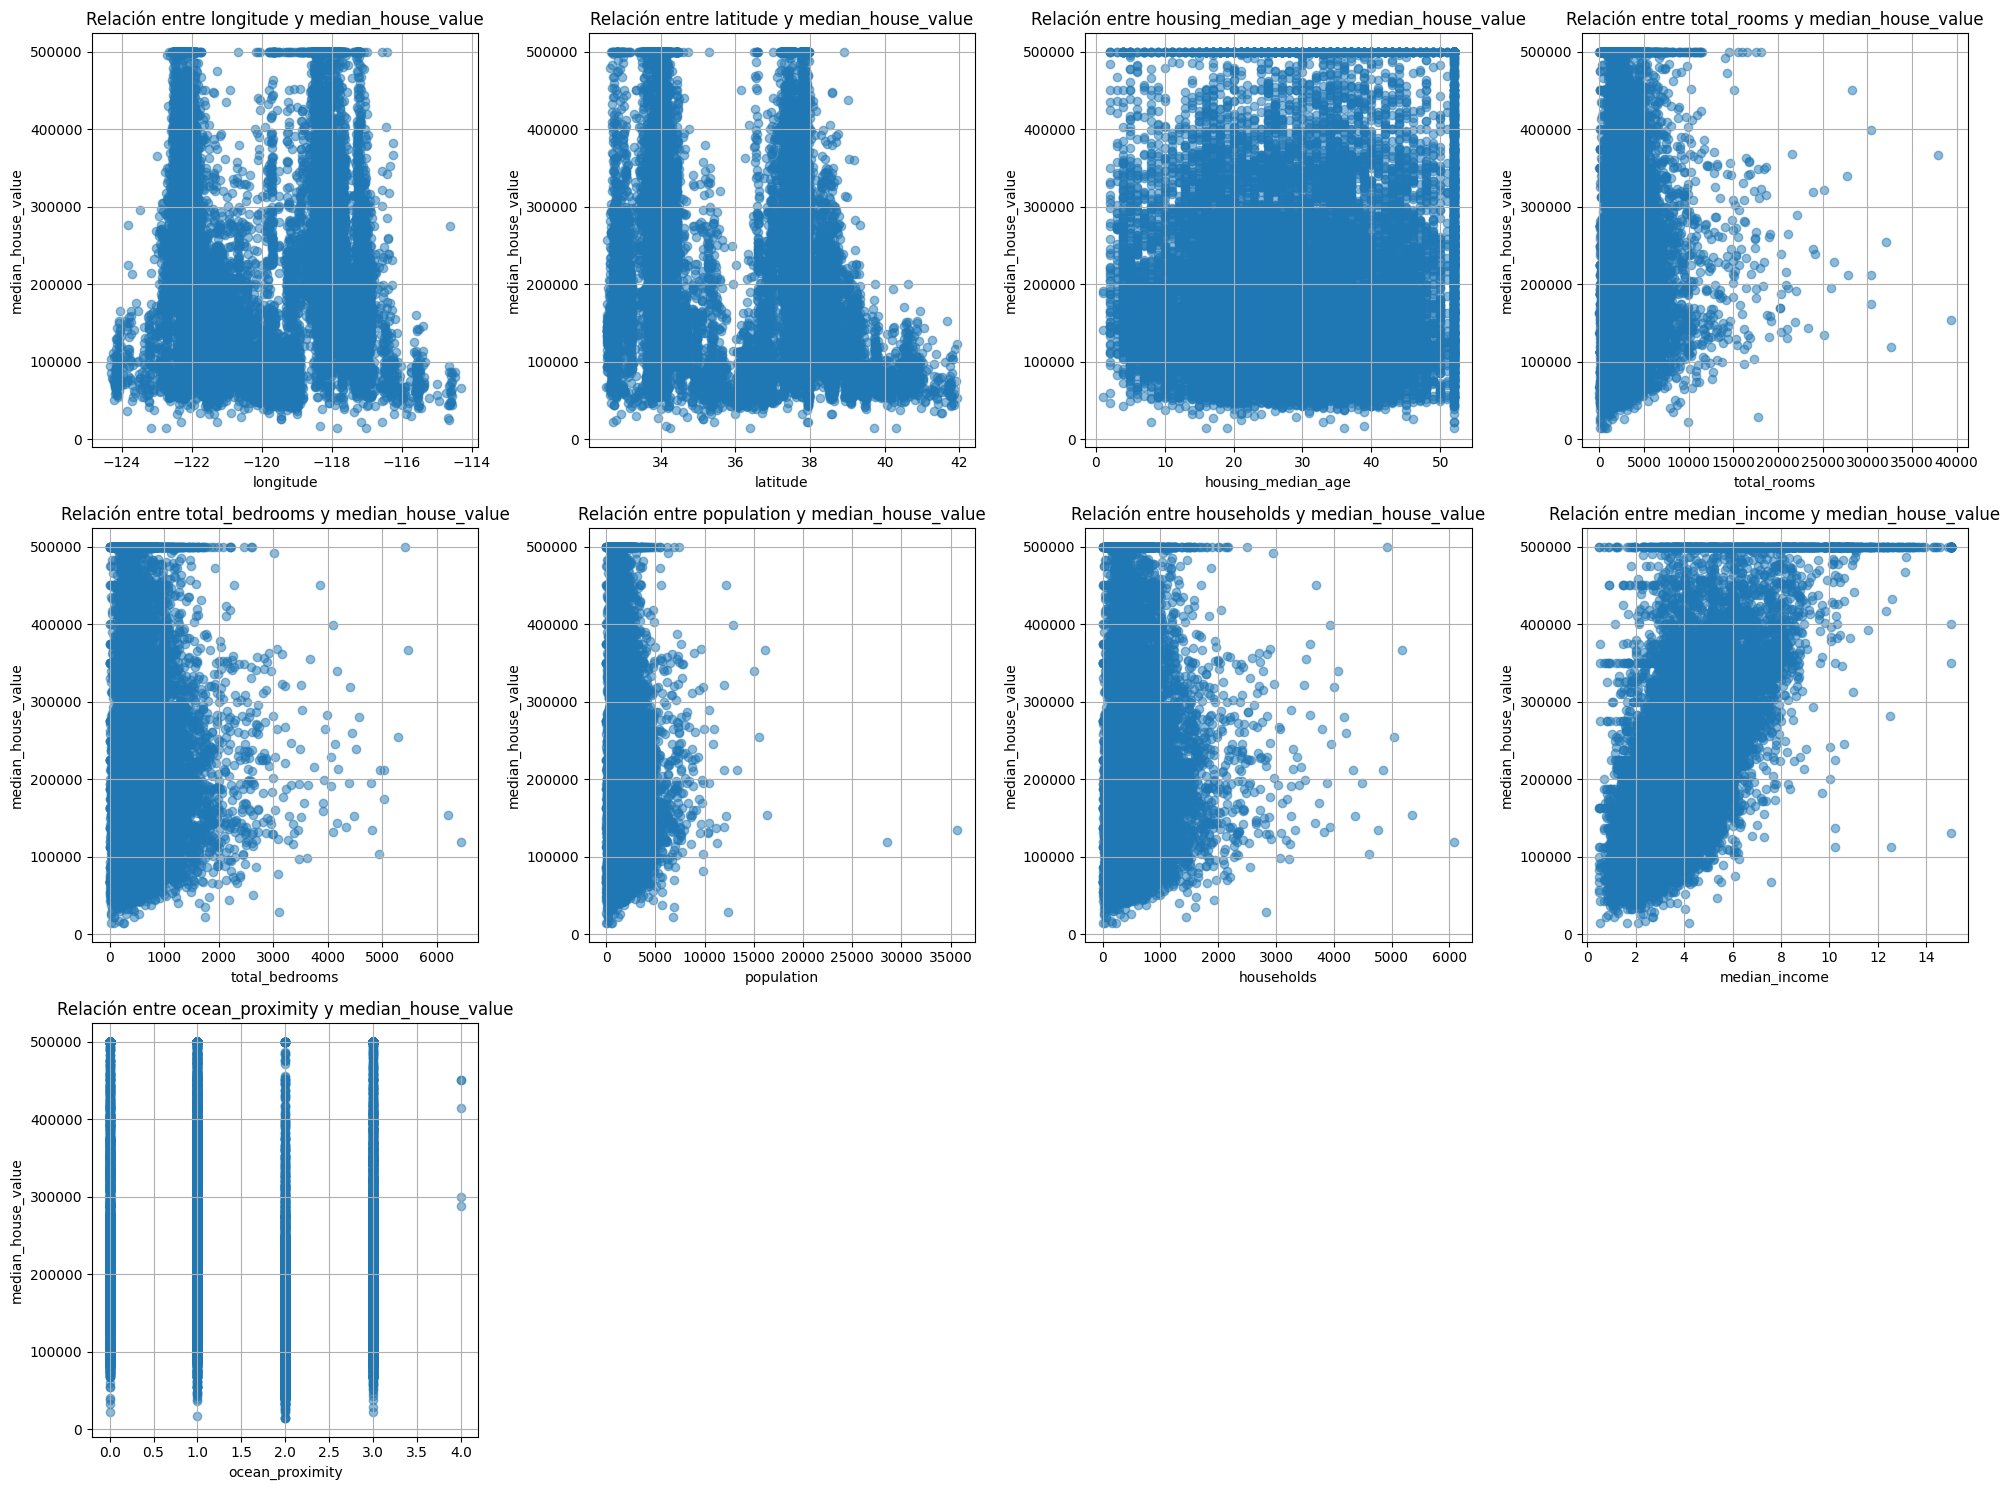

In [6]:
import matplotlib.pyplot as plt

# Detectar automáticamente las columnas del dataset que no son la variable dependiente
dependent_var = 'median_house_value'  # Cambiar dependiendo del dataset
independent_vars = [col for col in data.columns if col != dependent_var]

# Configuración del diseño de subgráficos
num_vars = len(independent_vars)
cols = 4  # Número de columnas en el diseño ajustadas automaticamente
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar los gráficos
for i, var in enumerate(independent_vars):
    ax = axes[i]
    ax.scatter(data[var], data[dependent_var], alpha=0.5)
    ax.set_title(f'Relación entre {var} y {dependent_var}')
    ax.set_xlabel(var)
    ax.set_ylabel(dependent_var)
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(independent_vars), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

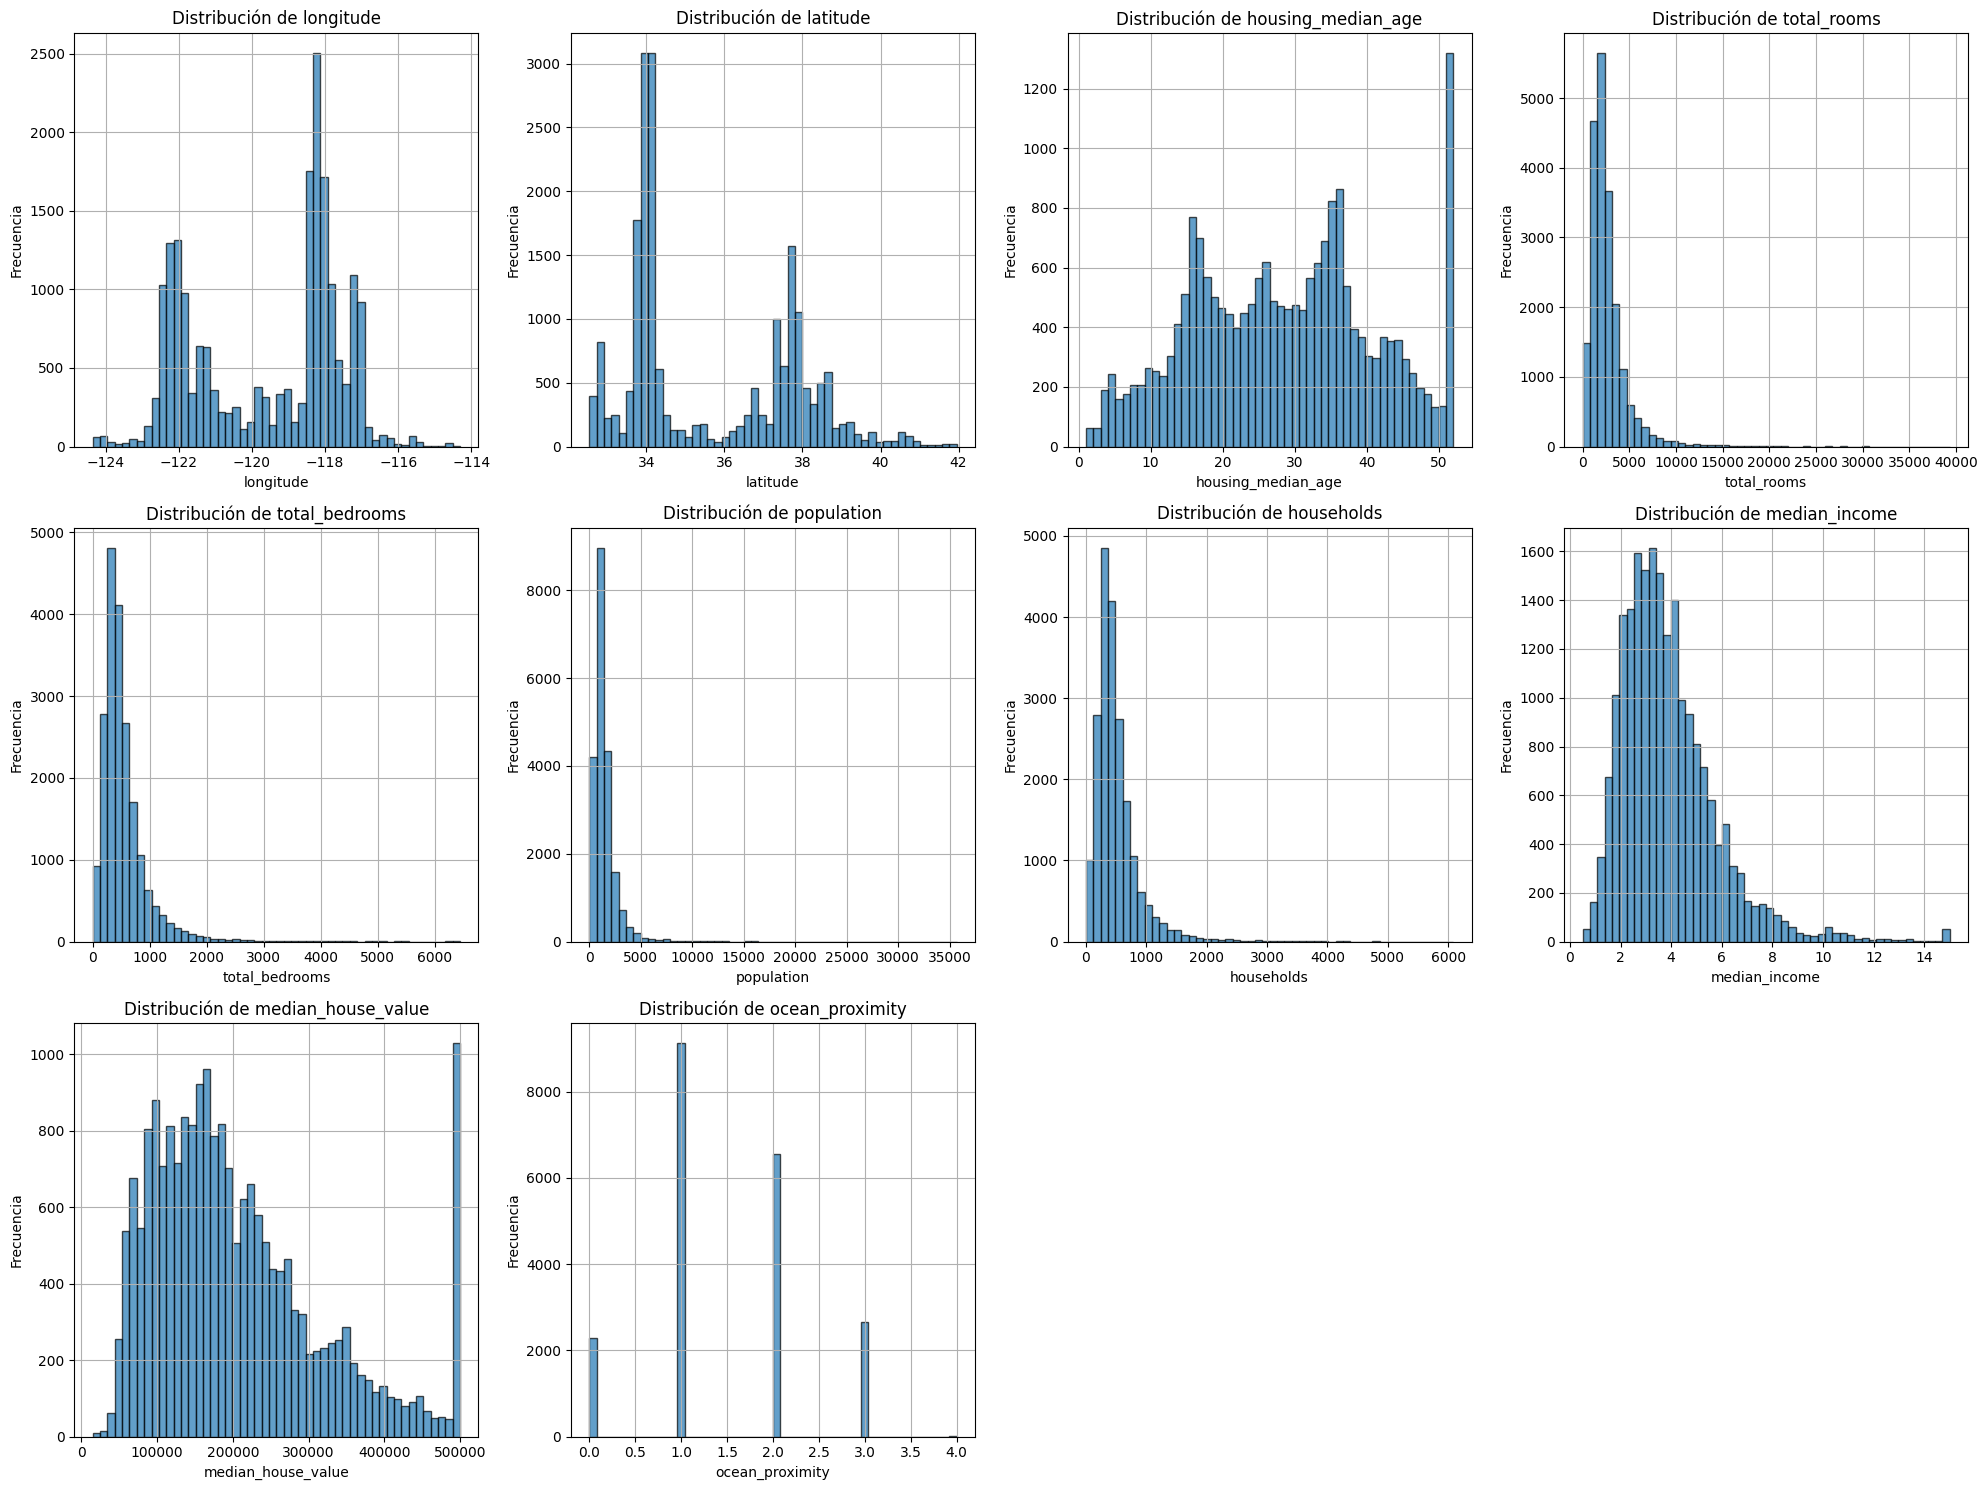

In [7]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = data.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(data[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Dividir los datos en variables independientes (X) y dependiente (y)
X = data.drop('median_house_value', axis=1)  # Variables independientes
y = data['median_house_value']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Construir el modelo de red neuronal para regresión
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Una neurona de salida para regresión
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenar el modelo
model.fit(X_train_normalized, y_train, epochs=20, batch_size=32, verbose=1)




Epoch 1/20


516/516 [==============================] - 1s 703us/step - loss: 40583716864.0000 - mean_squared_error: 40583716864.0000
Epoch 2/20
516/516 [==============================] - 0s 670us/step - loss: 9920275456.0000 - mean_squared_error: 9920275456.0000
Epoch 3/20
516/516 [==============================] - 0s 655us/step - loss: 7039093248.0000 - mean_squared_error: 7039093248.0000
Epoch 4/20
516/516 [==============================] - 0s 640us/step - loss: 5760599040.0000 - mean_squared_error: 5760599040.0000
Epoch 5/20
516/516 [==============================] - 0s 701us/step - loss: 5118259712.0000 - mean_squared_error: 5118259712.0000
Epoch 6/20
516/516 [==============================] - 0s 673us/step - loss: 4779067904.0000 - mean_squared_error: 4779067904.0000
Epoch 7/20
516/516 [==============================] - 0s 675us/step - loss: 4593896448.0000 - mean_squared_error: 4593896448.0000
Epoch 8/20
516/516 [==============================] - 0s 681us/step - loss: 44875013

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predecir los valores del conjunto de prueba
y_pred = model.predict(X_test_normalized)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Raíz cuadrada del MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


129/129 [==============================] - 0s 554us/step
Mean Squared Error (MSE): 6843699116.86
Root Mean Squared Error (RMSE): 82726.65
Mean Absolute Error (MAE): 54703.35
R² Score: 0.48


In [10]:
import pandas as pd

# Variable para definir cuántas predicciones mostrar
num_predicciones = 20  # Modifica este valor manualmente según lo que desees visualizar

# Crear un DataFrame para comparar valores reales y predicciones
resultados = pd.DataFrame({
    'Valor Real': y_test[:num_predicciones].values,
    'Predicción': y_pred[:num_predicciones].flatten()
})

# Mostrar el DataFrame
print(resultados)

    Valor Real   Predicción
0      47700.0  1299.585449
1      45800.0  1299.585449
2     500001.0  1299.585449
3     218600.0  1299.585449
4     278000.0  1299.585449
5     158700.0  1299.585449
6     198200.0  1299.585449
7     157500.0  1299.585449
8     340000.0  1299.585449
9     446600.0  1299.585449
10    123200.0  1299.585449
11    253900.0  1299.585449
12    215100.0  1299.585449
13    220500.0  1299.585449
14    219800.0  1299.585449
15    136200.0  1299.585449
16    178400.0  1299.585449
17    187500.0  1299.585449
18    139800.0  1299.585449
19    137500.0  1299.585449


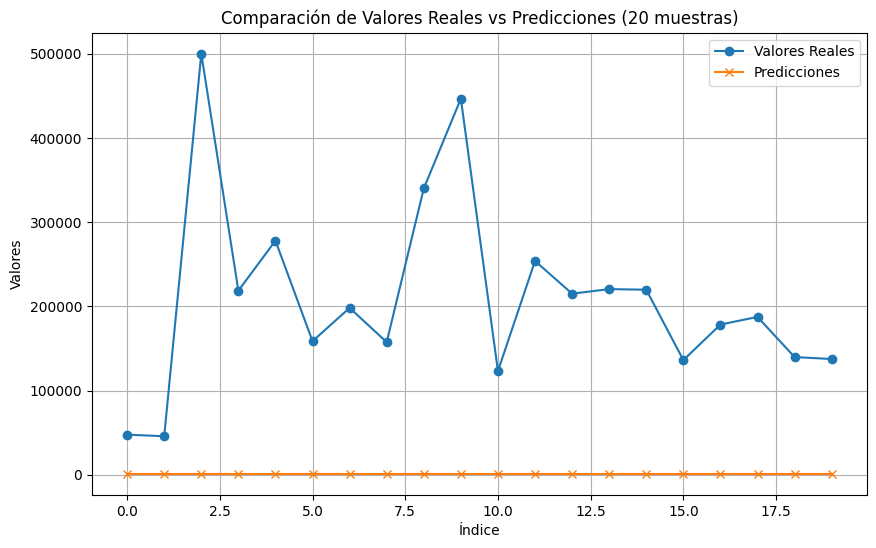

In [11]:
import matplotlib.pyplot as plt

# Variable para definir cuántas predicciones mostrar
num_predicciones = 20  # Modifica este valor según lo que desees visualizar

# Obtener las primeras 'num_predicciones' predicciones y valores reales
y_real = y_test[:num_predicciones].values
y_predicciones = y_pred[:num_predicciones].flatten()  # Asegurar que las predicciones tengan una dimensión adecuada

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(num_predicciones), y_real, label='Valores Reales', marker='o')
plt.plot(range(num_predicciones), y_predicciones, label='Predicciones', marker='x')
plt.title(f'Comparación de Valores Reales vs Predicciones ({num_predicciones} muestras)')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()


### Ahora ustedes deben ajustar las metricas del modelo... 
### Algunas sugerencias para que tomen en consideracion:
* Modificar la arquitectura de la red neuronal, como por ejemplo agregar capas, agregar capas de regularizacion como l2 o dropout.
* Utilizar una tasa de aprendizaje y modificar el optimizador
* Aumentar el numero de epocas